In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invweibull
from scipy.stats import dweibull
import scipy.stats as stats
import weibull

In [2]:
%matplotlib notebook

In [3]:
def Weibull(Z2,sigma2W,etaW):
    # Getting the Weibull distribution
    rhoW = etaW/(sigma2W)*(Z2/sigma2W)**(etaW-1)*np.exp(-(Z2/sigma2W)**etaW)
    return rhoW

<IPython.core.display.Javascript object>


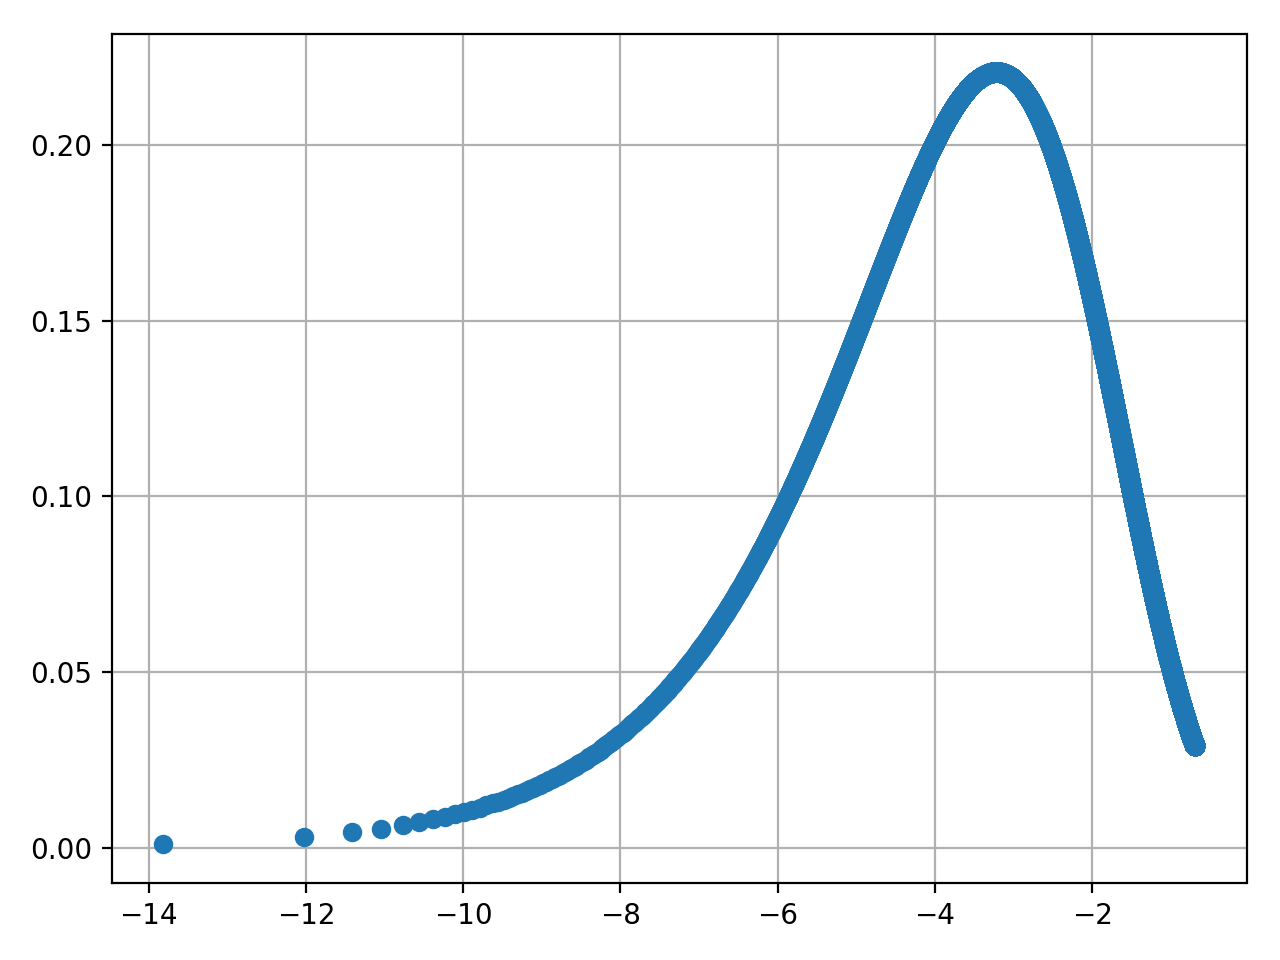

0.988070456869


In [13]:
# Generate a trial function
sigmaW = 0.2
sigma2W = sigmaW**2
etaW = 0.6
Z2max = .5
Z2 = np.linspace(0.000001,Z2max,100000)
y = np.log(Z2)
myWeibull = Weibull(Z2,sigma2W,etaW)
new_rho = myWeibull*Z2
plt.figure()
plt.plot(y,new_rho,'o')
plt.grid(True)
integral_rho = np.trapz(new_rho, y)
print(integral_rho)

In [42]:
# # Fit myWeibull(Z2) to obtain the best-fit sigmaW and etaW ...
# params = stats.exponweib.fit(Z2, floc=0, f0=1)
# shape = params[1]
# scale = params[3]
# print(shape)
# print(scale)
# values,bins,hist = plt.hist(Z2,bins=51,range=(0,25),normed=True)
# center = (bins[:-1] + bins[1:]) / 2.
# plt.plot(center,stats.exponweib.pdf(center,*params))



<IPython.core.display.Javascript object>


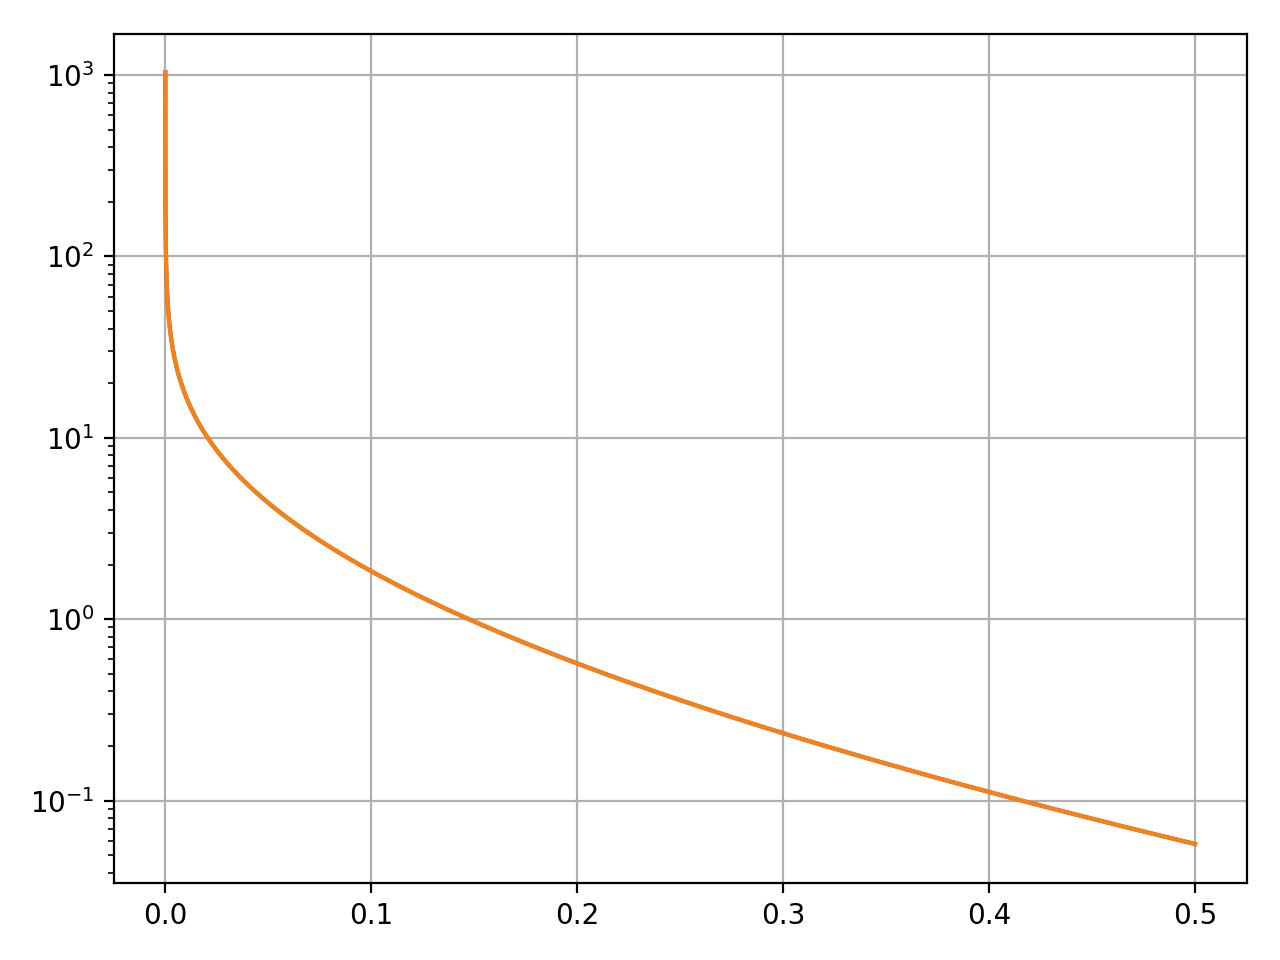

In [14]:
plt.figure()
plt.semilogy(Z2, myWeibull)
plt.semilogy(Z2, stats.exponweib.pdf((Z2/sigma2W), 1, etaW)/sigma2W)
plt.grid(True)

36.9426729451


<IPython.core.display.Javascript object>


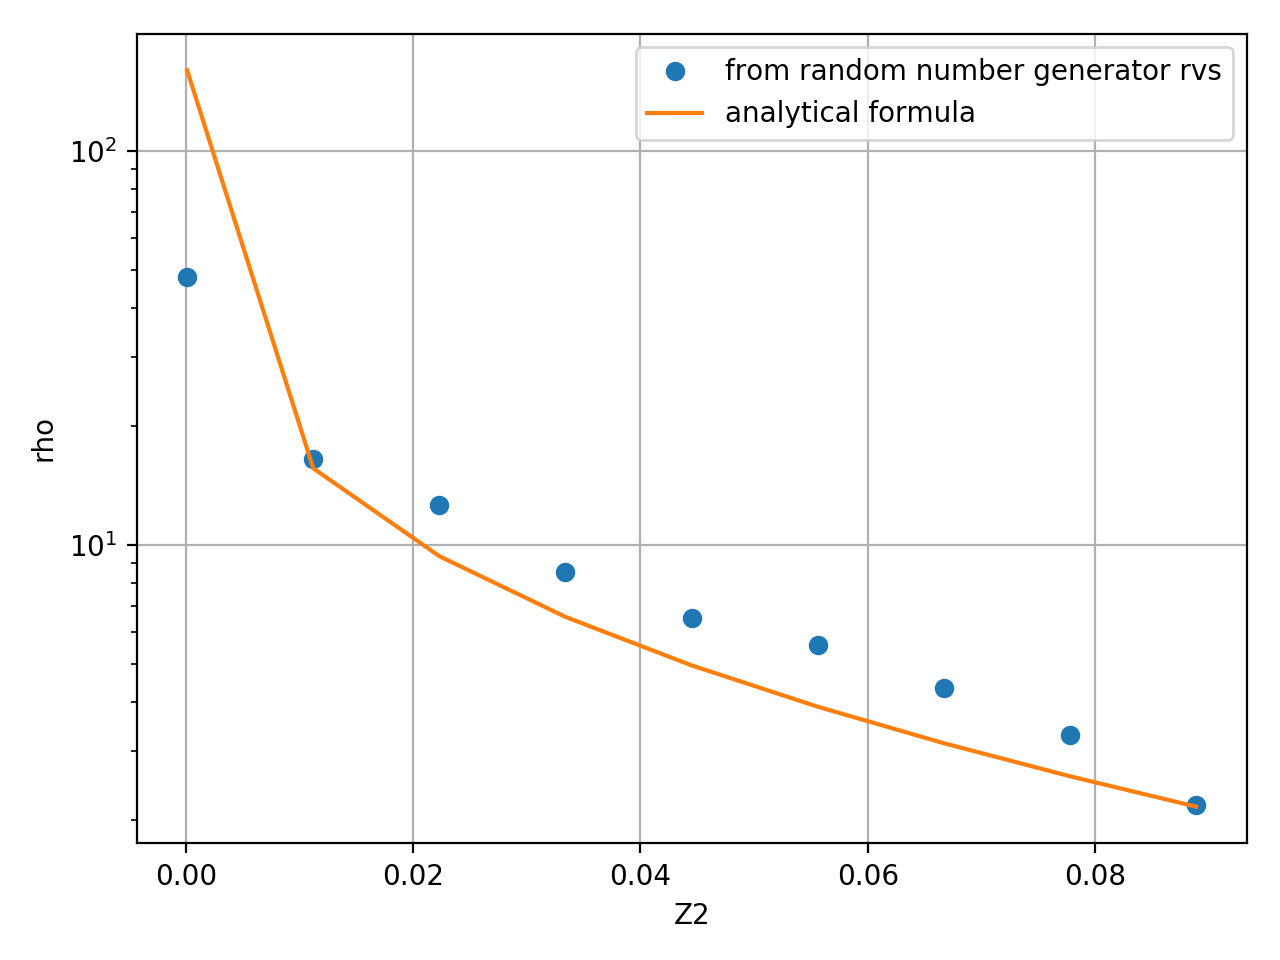

Text(0,0.5,'rho')

In [15]:
x_rand = stats.exponweib.rvs(1, etaW, size=5000)*sigma2W
bins = np.linspace(0.0001, 0.1, 10)
counts, bins = np.histogram(x_rand, bins)
newbins = bins[0: -1]

# normalizing our function
y2 = np.log(newbins)
counts_prime = counts*newbins

integral_y2 = np.trapz(counts_prime, y2)
print(integral_y2)

counts = counts/integral_y2

plt.figure()

plt.semilogy(newbins, counts, 'o', label='from random number generator rvs')
#plt.semilogy(Z2, myWeibull)
plt.semilogy(newbins, Weibull(newbins,sigma2W,etaW), label = 'analytical formula')
plt.grid(True)
plt.legend()
plt.xlabel('Z2')
plt.ylabel('rho')


<IPython.core.display.Javascript object>


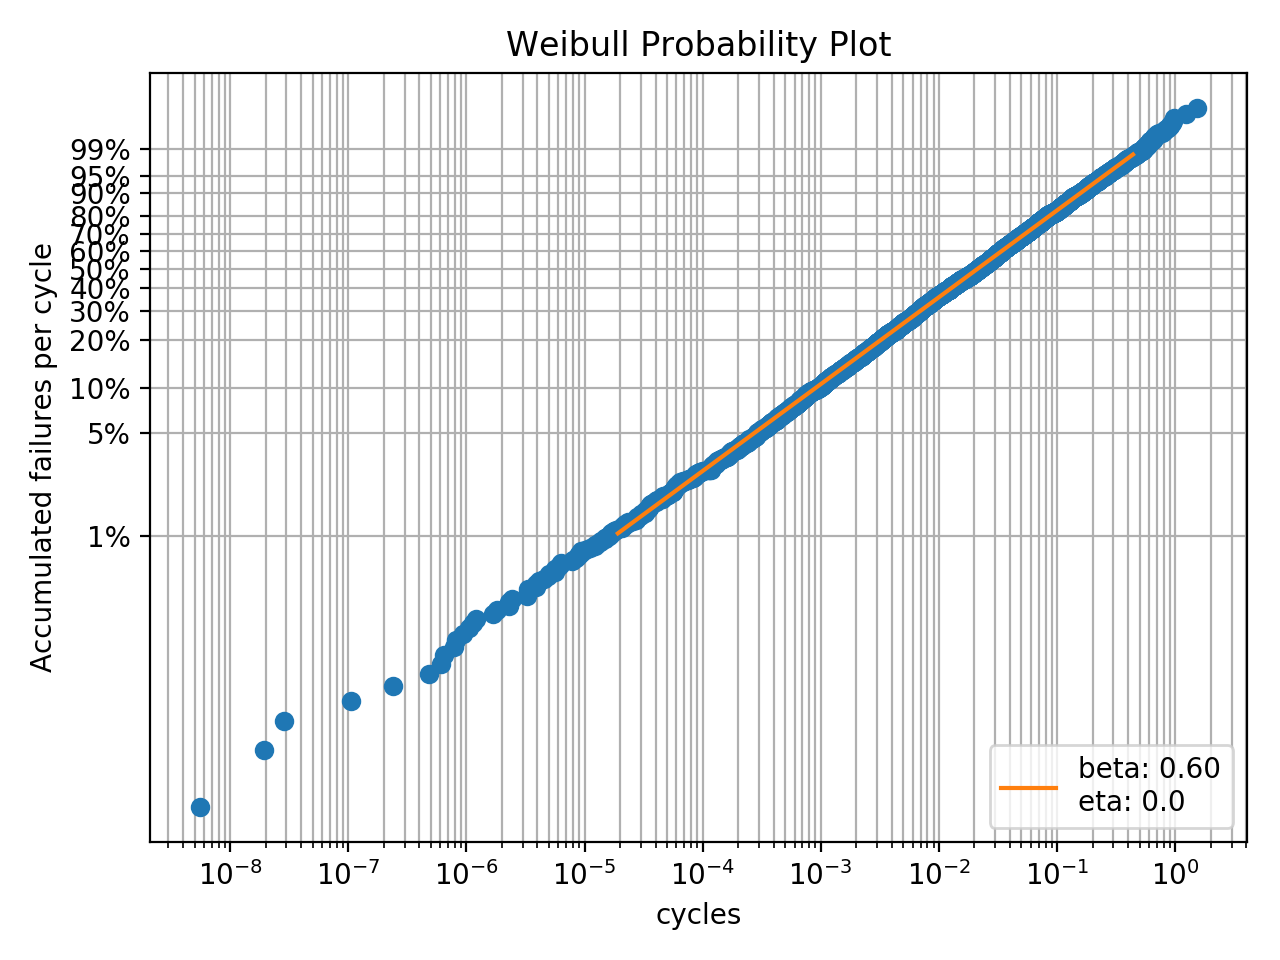

fit method          maximum likelihood estimation
confidence                                    0.9
beta lower limit                         0.586226
beta nominal                             0.596942
beta upper limit                         0.607855
eta lower limit                         0.0376769
eta nominal                              0.039255
eta upper limit                         0.0408993
mean life                               0.0594587
median life                             0.0212445
b10 life                              0.000905069
dtype: object


In [16]:
#extracting weibull parameters from random data
analysis = weibull.Analysis(x_rand)
#for number of points greater than 15 use maximum likelihood estimation 'mle', if less than then use linear regression 'lr'
analysis.fit(method='mle')
plt.figure()
analysis.probplot()
#prints statistics that includes beta and eta
#it is important to note that their beta is "our" eta and their eta is our "sigma squared"
print(analysis.stats)
